## Coupon Collector

In [14]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from scipy.stats import cumfreq
import time
import random
import numba
from numba import jit

**A:** Basic idea is to generate random numbers and put them in a hashset once the hashset has reached the size of our sample i.e. $n$ then we have seen all the numbers $i \in [n]$.

In [15]:
@jit
def coupon1(n):
    collected = np.full(n, False)
    k = 0
    unique = 0
    rand = random.random
    
    while unique < n:
        num = int(n*rand())
        if not collected[num]:
            unique += 1
            collected[num] = True
        k += 1
    
    return k

In [16]:
coupon1(300)

1687

**B:** Simply loop through 400 times and keep track of the number of trials.

In [17]:
n = 300
m = 400

ks = np.zeros(m)
for i in range(m):
    ks[i] = coupon1(n)

In [18]:
@jit
def coupon_experiment_loop(m, n):
    ks = np.empty(m)
    for i in range(m):
        k = coupon1(n)
        ks[i] = k

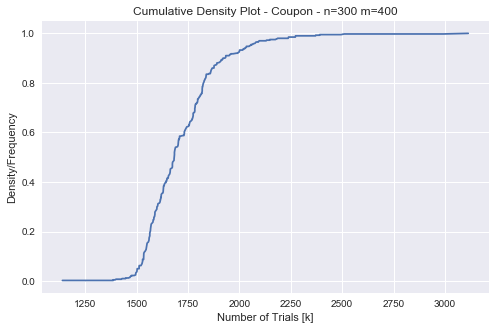

In [19]:
plt.figure(figsize=(8,5))
plt.plot(np.sort(ks), cumfreq(np.sort(ks), numbins=m)[0]/m)
plt.title('Cumulative Density Plot - Coupon - n=300 m=400')
plt.xlabel('Number of Trials [k]')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('cumplot-coupon1.png')

**C:** The expected number of trials from the data is simply the mean of the 400 experiments we ran.

In [20]:
ks.mean()

1875.305

Expected number of trials:  1875.305


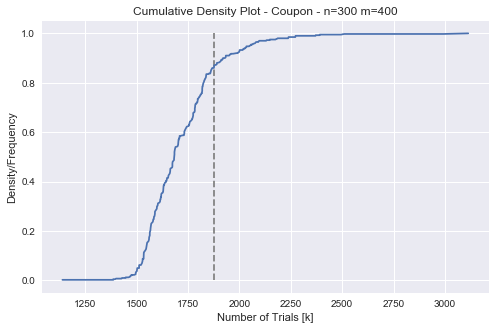

In [21]:
plt.figure(figsize=(8,5))
plt.plot(np.sort(ks), cumfreq(np.sort(ks), numbins=m)[0]/m)
plt.vlines(ks.mean(), ymin=0, ymax=1, linestyle='--', color='gray')
plt.title('Cumulative Density Plot - Coupon - n=300 m=400')
plt.xlabel('Number of Trials [k]')
plt.ylabel('Density/Frequency')
plt.margins(0.05)
plt.savefig('cumplot-coupon2.png')

print('Expected number of trials: ', ks.mean())

**D:** Now we analyze the runtime of these generations. We will run $m=400,2700,5000$ trials for 10 equally spaced values in the interval $[300,20000]$.

In [25]:
ns = np.linspace(300, 20000, num=15, dtype='int')
ms = np.linspace(400, 5000, num=3, dtype='int')

runtimes = np.zeros((len(ms),len(ns)))

for i, m in enumerate(ms):
    for j, n in enumerate(ns):
        start = time.time()
        coupon_experiment_loop(m,n)
        end = time.time()
        print(m,n)
        runtimes[i,j] = end - start
        
    

400 300
400 1707
400 3114
400 4521
400 5928
400 7335
400 8742
400 10150
400 11557
400 12964
400 14371
400 15778
400 17185
400 18592
400 20000
2700 300
2700 1707
2700 3114
2700 4521
2700 5928
2700 7335
2700 8742
2700 10150
2700 11557
2700 12964
2700 14371
2700 15778
2700 17185
2700 18592
2700 20000
5000 300
5000 1707
5000 3114
5000 4521
5000 5928
5000 7335
5000 8742
5000 10150
5000 11557
5000 12964
5000 14371
5000 15778
5000 17185
5000 18592
5000 20000


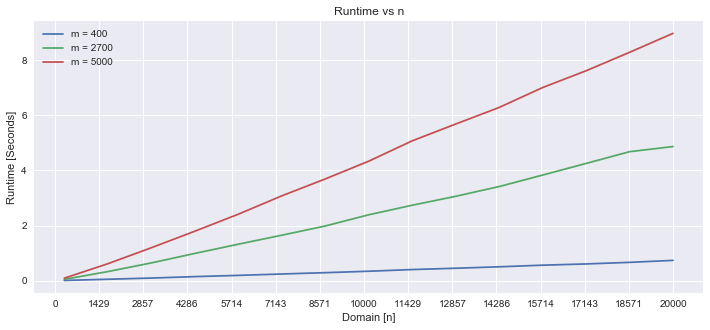

In [26]:
plt.figure(figsize=(12,5))
plt.plot(ns, runtimes[0,:], label='m = 400')
plt.plot(ns, runtimes[1,:], label='m = 2700')
plt.plot(ns, runtimes[2,:], label='m = 5000')
plt.xticks(np.linspace(0,20000, 15))
plt.xlabel('Domain [n]')
plt.ylabel('Runtime [Seconds]')
plt.title('Runtime vs n')
plt.legend()
plt.savefig('coupon-runtime.png')

In [24]:
%timeit coupon_experiment_loop(400,300)

7.18 ms ± 53.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
